You can check and explore further methods applied the tasks we have previously covered from the following link:
https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d313030

Skeleton code is provided from the following tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Dataset: https://pytorch.org/docs/stable/_modules/torchvision/datasets/cifar.html#CIFAR100

In [ ]:

def data_normalize(): # rename based on your choice
    return transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomRotation(40)])


In [ ]:

batch_size = 4


trainset = torchvision.datasets.CIFAR100(root='./data/CIFAR100', train=True,
                                        download=True, transform=data_normalize())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data/CIFAR100', train=False,
                                       download=True, transform=data_normalize())

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 
           'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 
           'chimpanzee', 'clock', 'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 
           'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
           'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 
           'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 
           'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
           'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
           'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm')

Extracting ./data/CIFAR100/cifar-100-python.tar.gz to ./data/CIFAR100
Files already downloaded and verified


In [ ]:
# let's visualize some examples
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([4, 3, 32, 32])
torch.Size([4])
tensor([22, 54, 19, 72])


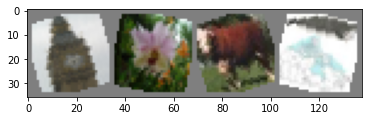

clock orchids cattle  seal


In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
# base method we provide:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 200)
        self.fc2 = nn.Linear(200, 128)
        self.fc3 = nn.Linear(128, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:

class MyOwnNet(Net):
    def __init__(self):
        super(Net, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),  #64x16x16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),   #128x8x8

            nn.Conv2d(128,256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),      #256x4x4
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512, 100)
        )
    
    def forward(self, x):
        return self.network(x)

In [ ]:
# if you want to train on GPU:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [ ]:
# Do not forget to initialize your own network if you defined one!
#inzvaNet = MyOwnNet()
myownnet = MyOwnNet()

myownnet.to(device)

myownnet.train()
# base optimizer with following parameters:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myownnet.parameters(), lr=0.001, momentum=0.9)



In [ ]:
# Training loop
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = myownnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.546
[1,  4000] loss: 3.508
[1,  6000] loss: 3.461
[1,  8000] loss: 3.412
[1, 10000] loss: 3.384
[1, 12000] loss: 3.304
[2,  2000] loss: 3.229
[2,  4000] loss: 3.180
[2,  6000] loss: 3.155
[2,  8000] loss: 3.100
[2, 10000] loss: 3.076
[2, 12000] loss: 3.024
[3,  2000] loss: 2.923
[3,  4000] loss: 2.863
[3,  6000] loss: 2.893
[3,  8000] loss: 2.825
[3, 10000] loss: 2.833
[3, 12000] loss: 2.816
[4,  2000] loss: 2.639
[4,  4000] loss: 2.665
[4,  6000] loss: 2.639
[4,  8000] loss: 2.618
[4, 10000] loss: 2.609
[4, 12000] loss: 2.609
[5,  2000] loss: 2.408
[5,  4000] loss: 2.435
[5,  6000] loss: 2.446
[5,  8000] loss: 2.462
[5, 10000] loss: 2.423
[5, 12000] loss: 2.392
[6,  2000] loss: 2.216
[6,  4000] loss: 2.253
[6,  6000] loss: 2.253
[6,  8000] loss: 2.239
[6, 10000] loss: 2.251
[6, 12000] loss: 2.231
[7,  2000] loss: 2.022
[7,  4000] loss: 2.096
[7,  6000] loss: 2.074
[7,  8000] loss: 2.090
[7, 10000] loss: 2.095
[7, 12000] loss: 2.102
[8,  2000] loss: 1.875
[8,  4000] 

KeyboardInterrupt: ignored

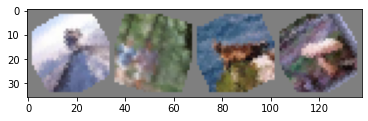

GroundTruth:  mountain flatfish  seal mushrooms
Predicted:  bridge rabbit  crab trout


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

images = images.cuda()
labels = labels.cuda()

outputs = myownnet(images)
_, predicted = torch.max(outputs.data, 1)
# print images
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(batch_size)))

In [ ]:
# test on all test data
myownnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = myownnet(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct)
print(total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

4214
10000
Accuracy of the network on the 10000 test images: 42 %


In [ ]:
# class-wise accuracy
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = myownnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apples : 67 %
Accuracy of aquarium fish : 57 %
Accuracy of  baby : 39 %
Accuracy of  bear : 19 %
Accuracy of beaver : 34 %
Accuracy of   bed : 16 %
Accuracy of   bee : 32 %
Accuracy of beetle : 52 %
Accuracy of bicycle : 40 %
Accuracy of bottles : 37 %
Accuracy of bowls : 21 %
Accuracy of   boy : 15 %
Accuracy of bridge : 39 %
Accuracy of   bus : 42 %
Accuracy of butterfly : 11 %
Accuracy of camel : 35 %
Accuracy of  cans : 32 %
Accuracy of castle : 78 %
Accuracy of caterpillar : 42 %
Accuracy of cattle : 24 %
Accuracy of chair : 77 %
Accuracy of chimpanzee : 58 %
Accuracy of clock : 39 %
Accuracy of cloud : 65 %
Accuracy of cockroach : 62 %
Accuracy of computer keyboard : 32 %
Accuracy of couch : 31 %
Accuracy of  crab : 34 %
Accuracy of crocodile : 50 %
Accuracy of  cups : 35 %
Accuracy of dinosaur : 44 %
Accuracy of dolphin : 55 %
Accuracy of elephant : 35 %
Accuracy of flatfish : 34 %
Accuracy of forest : 45 %
Accuracy of   fox : 21 %
Accuracy of  girl : 51 %
Accuracy o